In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from memory_profiler import memory_usage
import timeit

In [ ]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def evaluate_model(X_train, X_test, y_train, y_test):
    svm = SVC()
    svm.fit(X_train, y_train)  
    y_pred = svm.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred) 
    report = classification_report(y_test, y_pred)
    return accuracy, report

In [13]:
start_time_no_pca = timeit.default_timer()
mem_usage_no_pca = memory_usage((evaluate_model, (X_train, X_test, y_train, y_test)))
accuracy_no_pca, report_no_pca = evaluate_model(X_train, X_test, y_train, y_test)
end_time_no_pca = timeit.default_timer() - start_time_no_pca

In [14]:
print(f'Accuracy without PCA: {accuracy_no_pca:.2f}')
print(f'Training time without PCA: {end_time_no_pca:.4f} seconds')
print(f'Memory usage without PCA: {max(mem_usage_no_pca) - min(mem_usage_no_pca):.2f} MiB')
print(report_no_pca)

Accuracy without PCA: 1.00
Training time without PCA: 0.1071 seconds
Memory usage without PCA: 0.01 MiB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
start_time_pca = timeit.default_timer()
mem_usage_pca = memory_usage((evaluate_model, (X_train_pca, X_test_pca, y_train, y_test)))
accuracy_pca, report_pca = evaluate_model(X_train_pca, X_test_pca, y_train, y_test)
end_time_pca = timeit.default_timer() - start_time_pca

In [17]:
print(f'Accuracy after PCA: {accuracy_pca:.2f}')
print(f'Training time after PCA: {end_time_pca:.4f} seconds')
print(f'Memory usage after PCA: {max(mem_usage_pca) - min(mem_usage_pca):.2f} MiB')
print(report_pca)

Accuracy after PCA: 1.00
Training time after PCA: 0.0911 seconds
Memory usage after PCA: 0.00 MiB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



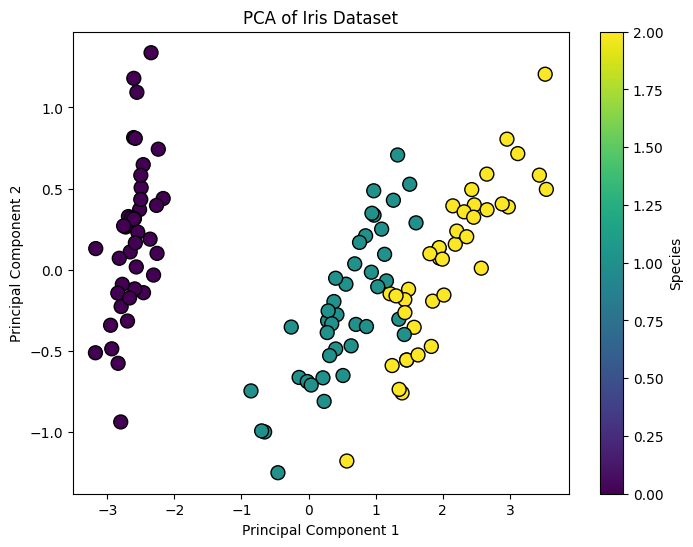

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.show()

In [19]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

Explained variance by each component: [0.91959926 0.05714377]
